# **PARTE I: Carga de Textos**
---

In [ ]:
import re
import spacy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from IPython.display import display
plt.style.use("ggplot")
spacy.cli.download("es_core_news_sm")

✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [ ]:
# ML models
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# scikit-learn:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import pickle
from sklearn.metrics import roc_auc_score

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arseniitretiakov/noticias-falsas-en-espaol")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/arseniitretiakov/noticias-falsas-en-espaol/versions/1


In [ ]:
import pandas as pd

# Assuming the dataset is in a CSV file named "fakes1000.csv"
file_path = path + "/fakes1000.csv"
df = pd.read_csv(file_path)

print(df.head()) # Print the first few rows of the DataFrame

   class                                               Text
0   True   Algunas de las voces extremistas más conocida...
1   True   Después de casi dos años y medio de luchas po...
2   True   Dos periodistas birmanos de la agencia Reuter...
3   True   El Cuerpo Nacional de Policía ha detenido a c...
4   True   El desfile de la firma en Roma se convierte e...


# **PARTE II: Análisis Exploratorio**
---

In [ ]:
!pip install pandas==1.5.3

**INFORMACIÓN GENERAL DEL DATAFRAME**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   2000 non-null   bool  
 1   Text    2000 non-null   object
dtypes: bool(1), object(1)
memory usage: 17.7+ KB


In [ ]:
df.astype({'class': 'category'}).dtypes

,0
class,category
Text,object


**DISTRIBUCIÓN DE LAS CLASES**

In [ ]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

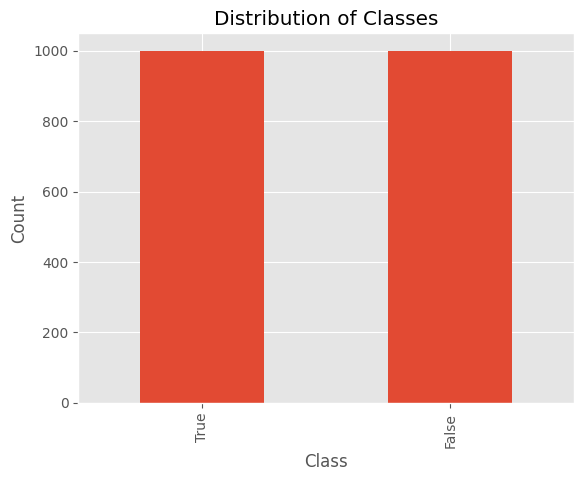

In [ ]:
df['class'].value_counts().plot(kind='bar')
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')

plt.savefig('class_distribution.png')

from google.colab import files
files.download('class_distribution.png')

**SEPARACIÓN DE TEXTOS DE ACUERDO CON LA CLASE**

In [ ]:
df_true = df[df['class'] == True]
df_false = df[df['class'] == False]

**CALCULO DE LA LONGITUD DEL TEXTO PARA CADA CLASE**

In [ ]:
df_true['Text_Length'] = df_true['Text'].str.split().str.len()
df_false['Text_Length'] = df_false['Text'].str.split().str.len()

<ipython-input-10-3450af500d0f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true['Text_Length'] = df_true['Text'].str.split().str.len()
<ipython-input-10-3450af500d0f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_false['Text_Length'] = df_false['Text'].str.split().str.len()


**HISTOGRAMA DE FRECUENCIA POR CLASE**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

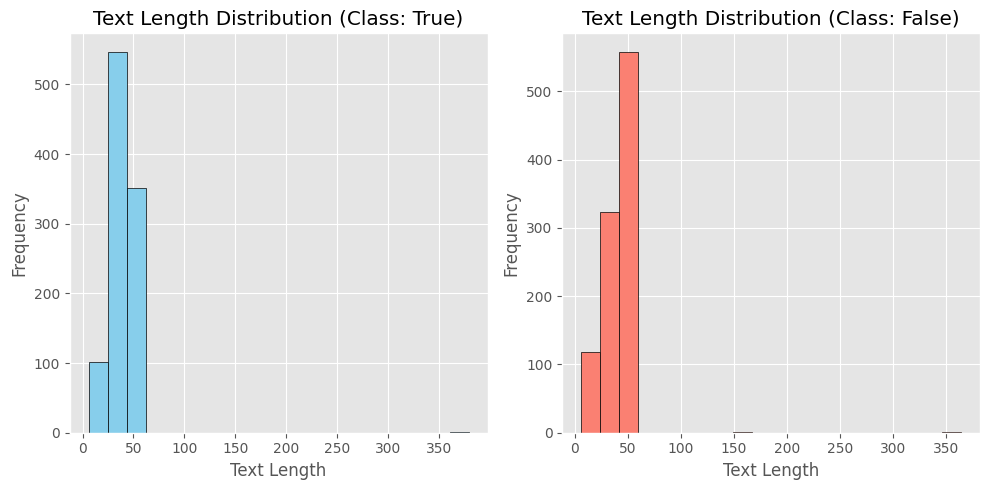

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(df_true['Text_Length'], bins=20, color='skyblue', edgecolor='black')
plt.title('Text Length Distribution (Class: True)')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df_false['Text_Length'], bins=20, color='salmon', edgecolor='black')
plt.title('Text Length Distribution (Class: False)')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('Text_Length_Distribution.png')

from google.colab import files
files.download('Text_Length_Distribution.png')


**ESTADÍSTICAS DESCRIPTIVAS POR CLASE**

In [ ]:
true_stats = df_true['Text_Length'].describe()
false_stats = df_false['Text_Length'].describe()

print("Statistics for Class: True\n", true_stats)
print("\nStatistics for Class: False\n", false_stats)

Statistics for Class: True
 count    1000.000000
mean       39.926000
std        13.937459
min         6.000000
25%        39.000000
50%        42.000000
75%        44.250000
max       379.000000
Name: Text_Length, dtype: float64

Statistics for Class: False
 count    1000.000000
mean       39.435000
std        14.677848
min         6.000000
25%        38.000000
50%        42.000000
75%        45.000000
max       364.000000
Name: Text_Length, dtype: float64


**DETECTANDO IDIOMA DE LOS TEXTOS**

In [ ]:
!pip install langdetect

from langdetect import detect
import pandas as pd

def detect_language(text):
    try:
        return detect(text)
    except:
        return 'unknown'

df['Language'] = df['Text'].apply(detect_language)

print(df[['Text', 'Language']].head())

                                                Text Language
0   Algunas de las voces extremistas más conocida...       es
1   Después de casi dos años y medio de luchas po...       es
2   Dos periodistas birmanos de la agencia Reuter...       es
3   El Cuerpo Nacional de Policía ha detenido a c...       es
4   El desfile de la firma en Roma se convierte e...       es


In [ ]:
spanish_count = df['Language'].value_counts()['es']

print("Number of texts in Spanish:", spanish_count)

Number of texts in Spanish: 1960


In [ ]:
non_spanish_df = df[df['Language'] != 'es'].head(30)

print(non_spanish_df) # Print the new DataFrame with non-Spanish texts

      class                                               Text Language
213   False   TELEFONO DE EMERGENCES DESDE MdVILES gratis P...       en
230   False  ¡¡¡MENSAJE MUY, MUY, MUY URGENTE E IMPORTANTE!...       pt
235   False  ¡ESTO S ESCNDALOSO! LS BNCO PONDRÁ UN CANON DE...       ca
236   False  ¡NOTICIA DE ULTIMA HORA! MUERE PAU DONÉS, VOCA...       en
246   False  ¿PORQUE LOS INFARTOS OCURREN MÁS A MENUDO EN E...       pt
268   False  «AGENTES DE LA POLICÍA Y DE LA GUARDIA CIVIL Q...       en
287   False  630 MILLONES DESTINADOS A AYUDAS AL DESARROLLO...       hu
353   False  ASÍ SE ENCUENTRAN LOS POBRES ANIMALITOS EN LOS...       de
358   False  ATENTOS Las Sopas de SOBRE. Contienen ADITIVOS...       de
364   False  AYER NOMÁS PAJARITO alferdez FERNÁNDEZ DECÍA Q...       de
458   False  Copiando a países serios DINAMARCA DA AYUDA SO...       pt
470   False  CUIDADO CON ESTE PELIGROSO INSECTO SI LO VES Q...       pt
537   False  EL ASTRO PORTUGUÉS DE FUTBOL CRISTIANO RONALDO...  

# **PARTE III: Preprocesamiento**
---

In [ ]:
df.head()

,class,Text,Language
0,True,Algunas de las voces extremistas más conocida...,es
1,True,Después de casi dos años y medio de luchas po...,es
2,True,Dos periodistas birmanos de la agencia Reuter...,es
3,True,El Cuerpo Nacional de Policía ha detenido a c...,es
4,True,El desfile de la firma en Roma se convierte e...,es


In [ ]:
df['class'] = df['class'].replace({True: 1, False: 0})

In [ ]:
df.head()

,class,Text,Language
0,1,Algunas de las voces extremistas más conocida...,es
1,1,Después de casi dos años y medio de luchas po...,es
2,1,Dos periodistas birmanos de la agencia Reuter...,es
3,1,El Cuerpo Nacional de Policía ha detenido a c...,es
4,1,El desfile de la firma en Roma se convierte e...,es


In [ ]:
!pip install spacy==3.5.3
!python -m spacy download es_core_news_sm

import spacy

# Carga el modelo en español de spaCy
nlp = spacy.load("es_core_news_sm")

def preprocess_text(text):

  doc = nlp(text)

  # Tokenización, eliminación de stopwords, lematización y minúsculas
  lemmas = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct]

  # Unión de lemas en una cadena de texto
  preprocessed_text = " ".join(lemmas)

  return preprocessed_text

2024-12-12 00:51:35.349902: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-12 00:51:35.384483: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-12 00:51:35.395416: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-12 00:51:37.141355: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 52.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [ ]:
# Aplica la función de preprocesamiento a la columna 'Text' de tu DataFrame
df['preprocessed_text'] = df['Text'].apply(preprocess_text)

In [ ]:
df.head()

,class,Text,Language,preprocessed_text
0,1,Algunas de las voces extremistas más conocida...,es,voz extremista conocido ee.uu. cuenta asocia...
1,1,Después de casi dos años y medio de luchas po...,es,año lucha política judicial donald trump pre...
2,1,Dos periodistas birmanos de la agencia Reuter...,es,periodista birmano agencia reuters liberar m...
3,1,El Cuerpo Nacional de Policía ha detenido a c...,es,cuerpo nacional policía detener persona acus...
4,1,El desfile de la firma en Roma se convierte e...,es,desfile firma roma convertir oda libertad mu...


# **PARTE IV: Extracción de Características**
---

#### *Método de Vectorización 1: Bolsa de Palabras*

In [ ]:
X=df['preprocessed_text']
y=df['class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)

In [ ]:
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
print(X_train_dtm.shape, X_test_dtm.shape)

(1600, 9013) (400, 9013)


#### *Método de Vectorización 2: WORD2VEC*

In [ ]:
from gensim.models import Word2Vec

In [ ]:
tokens = [text.split() for text in df['preprocessed_text']]

In [ ]:
model_w2v = Word2Vec(
            sentences = tokens,
            vector_size = 100,
            epochs = 20,
            workers = -1 # específica que se debe usar el número máximo de procesos.
            )

In [ ]:
def document_vector(doc, model):
    doc_vec = np.zeros((model.vector_size,), dtype="float32")
    num_words = 0
    for word in doc:
        if word in model.wv:
            doc_vec = np.add(doc_vec, model.wv[word])
            num_words += 1
    if num_words > 0:
        doc_vec = np.divide(doc_vec, num_words)
    return doc_vec

X_w2v = [document_vector(doc, model_w2v) for doc in tokens]
X_w2v = np.array(X_w2v)

# **PARTE V: Modelamiento**

#### *Modelo 1: Random Forest + Countvectorizer*

In [ ]:
model_1 = RandomForestClassifier(random_state=42)
model_1.fit(X_train_dtm, y_train)
y_pred=model_1.predict(X_test_dtm)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Countvectorizer: %.2f%%" % (accuracy * 100.0))

Accuracy Countvectorizer: 74.25%


#### *Modelo 2: Random Forest + Word2vec*

In [ ]:
X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(X_w2v, y, test_size=0.2, random_state=42)

model_rf_w2v = RandomForestClassifier(random_state=42)
model_rf_w2v.fit(X_train_w2v, y_train_w2v)

y_pred_w2v = model_rf_w2v.predict(X_test_w2v)

In [ ]:
accuracy_w2v = accuracy_score(y_test_w2v, y_pred_w2v)
accuracy_percentage = accuracy_w2v * 100
print("Accuracy Word2Vec: {:.2f}%".format(accuracy_percentage))

Accuracy Word2Vec: 60.50%


#### *Modelo 3: XGboost + Countvectorizer*

In [ ]:
model_3 = XGBClassifier()
model_3.fit(X_train_dtm, y_train)
y_pred_model_3=model_3.predict(X_test_dtm)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_model_3)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 69.00%


#### *Modelo 3: XGboost + Word2vec*

In [ ]:
model_xgb_w2v = XGBClassifier(random_state=42)
model_xgb_w2v.fit(X_train_w2v, y_train_w2v)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred_xgb_w2v = model_xgb_w2v.predict(X_test_w2v)

In [ ]:
accuracy_xgb_w2v = accuracy_score(y_test_w2v, y_pred_xgb_w2v)
accuracy_percentage_xgb = accuracy_xgb_w2v * 100

print("Accuracy with XGBoost and Word2Vec: {:.2f}%".format(accuracy_percentage_xgb))


Accuracy with XGBoost and Word2Vec: 59.25%
